## Analisis Fourier Signal

#### Transformasi Fourier

Transformasi Fourier adalah teknik matematika yang digunakan untuk:
- Mengubah sinyal dari domain waktu ke domain frekuensi
- Menganalisis komponen frekuensi yang membentuk suatu sinyal
- Memungkinkan pemrosesan sinyal yang lebih efektif untuk berbagai aplikasi

Terdapat dua implementasi utama:

1. **Discrete Fourier Transform (DFT)**:
   - Implementasi dasar dari transformasi Fourier untuk sinyal diskrit
   - Kompleksitas komputasi O(N²)
   - Formula matematika:
     $$
     X[k] = \sum_{0}^{N-1} x[n] * e^(\frac{-j2πkn}{N})
     $$
   - Dimana:
     - x[n] adalah sinyal input dalam domain waktu
     - X[k] adalah sinyal output dalam domain frekuensi
     - N adalah panjang sinyal
     - k adalah indeks frekuensi

2. **Fast Fourier Transform (FFT)**:
   - Algoritma yang lebih efisien untuk menghitung DFT
   - Kompleksitas komputasi O(N log N)
   - Menggunakan metode divide-and-conquer
   - Implementasi yang paling umum digunakan dalam praktik

---

Transformasi Fourier memiliki banyak aplikasi dalam kehidupan nyata:
- Pemrosesan sinyal audio (equalizer, filter)
- Analisis getaran mesin
- Pengolahan citra digital
- Kompresi data
- Analisis sinyal biomedis (EEG, ECG)
- Sistem komunikasi
- Spectral analysis dalam berbagai bidang sains

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy import fft

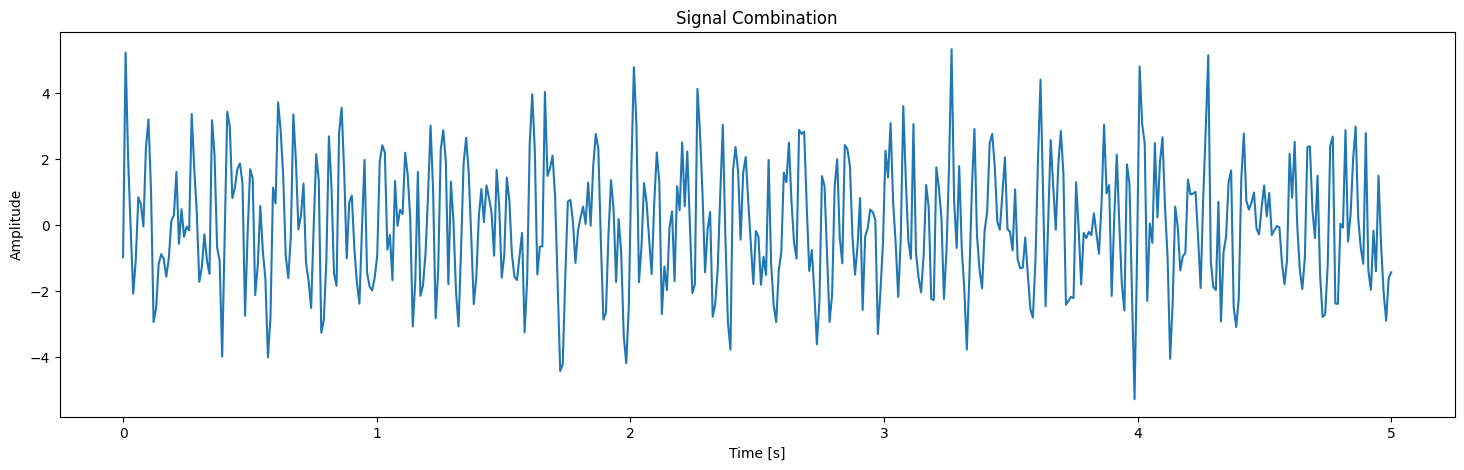

In [63]:
duration = 5 # seconds
fs = 100 # Sampling rate: Hz
f_1 = 5 # Hz
f_2 = 12 # Hz
f_3 = 15 # Hz
f_4 = 20 # Hz
f_5 = 22.5 # Hz

time_axis = np.linspace(0, duration, duration*fs)

signal_1 = np.sin(2*np.pi*f_1*time_axis)
signal_2 = np.sin(2*np.pi*f_2*time_axis)
signal_3 = np.sin(2*np.pi*f_3*time_axis)
signal_4 = np.sin(2*np.pi*f_4*time_axis)
signal_5 = np.sin(2*np.pi*f_5*time_axis)

noise = np.random.normal(0, 0.9, duration*fs)
signal_combination = signal_1 + signal_2 + signal_3 + signal_4 + signal_5 + noise

plt.figure(figsize=(18, 5))
plt.plot(time_axis, signal_combination)
plt.title('Signal Combination')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.show()

### 2.1 Pengaturan Parameter Sinyal

```python
# Signal parameters
duration = 5  # seconds
fs = 1000  # Hz
freq_1 = 5  # Hz
freq_2 = 12  # Hz
freq_3 = 20  # Hz
```

Parameter-parameter di atas menentukan karakteristik sinyal yang akan dibuat:
- `duration`: Panjang sinyal dalam detik
- `fs` (sampling frequency): Jumlah sampel per detik
- `freq_1`, `freq_2`, `freq_3`: Komponen frekuensi yang akan digabungkan

### 2.2 Pembuatan Array Waktu

```python
# Time array
t = np.linspace(0, duration, int(fs * duration))
```

- Fungsi `np.linspace()` membuat array dengan nilai yang terdistribusi merata
- Parameter:
  - Start: 0 detik
  - Stop: duration (5 detik)
  - Num: fs * duration (total sampel)
- Menghasilkan array waktu diskrit untuk sampling sinyal

### 2.3 Pembuatan Komponen Sinyal

```python
# Generate individual components
signal_1 = 1.0 * np.sin(2 * np.pi * freq_1 * t)
signal_2 = 0.5 * np.sin(2 * np.pi * freq_2 * t)  # Half amplitude
signal_3 = 0.3 * np.sin(2 * np.pi * freq_3 * t)  # One-third amplitude
```

Setiap komponen sinyal dibuat menggunakan fungsi sinus dengan karakteristik:
1. **Signal 1**: 
   - Frekuensi 5 Hz
   - Amplitudo 1.0 (amplitudo penuh)
   
2. **Signal 2**:
   - Frekuensi 12 Hz
   - Amplitudo 0.5 (setengah dari signal 1)
   
3. **Signal 3**:
   - Frekuensi 20 Hz
   - Amplitudo 0.3 (sepertiga dari signal 1)

Formula yang digunakan: A * sin(2πft)
- A: Amplitudo
- f: Frekuensi
- t: Waktu
- 2π: Konversi ke radian

### 2.4 Penggabungan Sinyal

```python
# Combine signals
combined_signal = signal_1 + signal_2 + signal_3
```

- Ketiga sinyal dijumlahkan untuk membuat sinyal komposit
- Hasil penjumlahan menghasilkan sinyal yang lebih kompleks
- Setiap komponen frekuensi masih dapat diidentifikasi melalui analisis Fourier

### 2.5 Penambahan Noise

```python
# Add some noise
np.random.seed(42)  # for reproducibility
noise = 0.1 * np.random.normal(0, 1, len(t))
noisy_signal = combined_signal + noise
```

Penambahan noise membuat sinyal lebih realistis:
- `np.random.seed(42)`: Memastikan hasil random yang konsisten setiap kali kode dijalankan
- `np.random.normal()`: Membuat noise Gaussian dengan:
  - Mean: 0
  - Standard deviation: 1
  - Amplitudo noise: 0.1 (10% dari amplitudo signal_1)
- `noisy_signal`: Sinyal akhir yang akan dianalisis

### Catatan Penting
1. Frekuensi sampling (fs = 1000 Hz) harus memenuhi Teorema Nyquist:
   - fs > 2 * fmax
   - fmax = 20 Hz (freq_3)
   - 1000 Hz >> 2 * 20 Hz = 40 Hz ✓

2. Amplitudo berbeda membantu dalam:
   - Membedakan komponen frekuensi
   - Menguji sensitivitas metode analisis Fourier
   - Memverifikasi akurasi magnitude spectrum

3. Noise menambahkan realisme karena dalam praktik:
   - Sinyal nyata selalu mengandung noise
   - Sistem pengukuran memiliki ketidakpastian
   - Lingkungan dapat mempengaruhi sinyal

---

## DFT Function


In [64]:
def calculate_dft(signal):
    """
    Calculate Discrete Fourier Transform (DFT) manually.
    
    Parameters:
    signal (array): Input time domain signal
    
    Returns:
    array: Frequency domain representation
    """
    N = len(signal)
    dft = np.zeros(N, dtype=complex)

    for k in range(N):
        for n in range(N):
            dft[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)

    return dft

--- 

### Code Explanation
- `N`: Menyimpan panjang sinyal input
- `dft`: Membuat array kosong sepanjang N dengan tipe data complex
  - Menggunakan tipe complex karena hasil DFT memiliki komponen real dan imaginary
  - Diinisialisasi dengan nilai nol

- For the loop :
    - Loop pertama (`k`): Merepresentasikan komponen frekuensi
    - Loop kedua (`n`): Merepresentasikan sampel waktu

- - Kompleksitas waktu: O(N²)
  - Dua nested loop, masing-masing berjalan N kali
  - Tidak efisien untuk sinyal panjang
  
- Memory usage: O(N)
  - Menyimpan array hasil sepanjang N
  - Tipe data complex membutuhkan lebih banyak memori


### FFT (Fast Fourier Transform)

Method to calculate the transformation with much faster

In [ ]:

def calculate_fft(signal):
    """
    Calculate Fast Fourier Transform (FFT) using iterative decimation in time.
    
    Parameters:
    signal (array): Input time domain signal
    
    Returns:
    array: Frequency domain representation
    """
    signal = np.asarray(signal, dtype=complex)
    N = len(signal)
    
    # Find next power of 2
    power = int(np.ceil(np.log2(N)))
    size = 1 << power  # 2^power
    
    # Pad signal with zeros to make it length of power of 2
    signal = np.pad(signal, (0, size - N))
    
    # Bit reversal permutation
    bits = power
    j = 0
    for i in range(1, size):
        swapPos = size >> 1
        
        while j >= swapPos:
            j -= swapPos
            swapPos >>= 1
            if swapPos == 0:
                break
                
        j += swapPos
        
        if i < j:
            signal[i], signal[j] = signal[j], signal[i]
    
    # Compute FFT using decimation in time
    block_size = 2
    while block_size <= size:
        angle = -2 * np.pi / block_size
        w = np.exp(1j * angle)
        
        for i in range(0, size, block_size):
            current_w = 1
            
            for j in range(i, i + block_size // 2):
                k = j + block_size // 2
                temp = current_w * signal[k]
                signal[k] = signal[j] - temp
                signal[j] = signal[j] + temp
                current_w *= w
                
        block_size *= 2
    
    # Return only the part corresponding to the original signal length
    return signal[:N]



### 4.1 Definisi Fungsi dan Persiapan Data

```python
def calculate_fft(signal):
    signal = np.asarray(signal, dtype=complex)
    N = len(signal)
```
- Fungsi menerima sinyal input dalam domain waktu
- Mengkonversi input menjadi array NumPy bertipe complex
- Menyimpan panjang sinyal asli dalam variabel N

### 4.2 Padding Sinyal ke Power of 2

```python
# Find next power of 2
power = int(np.ceil(np.log2(N)))
size = 1 << power  # 2^power

# Pad signal with zeros
signal = np.pad(signal, (0, size - N))
```

- FFT bekerja optimal dengan panjang sinyal 2^n
- Mencari power of 2 terdekat yang lebih besar dari N
- Contoh: 
  - Jika N = 1000
  - Next power of 2 = 1024 (2^10)
- Menambahkan nilai nol (zero padding) hingga mencapai panjang yang diinginkan

### 4.3 Bit Reversal Permutation

```python
bits = power
j = 0
for i in range(1, size):
    swapPos = size >> 1
    
    while j >= swapPos:
        j -= swapPos
        swapPos >>= 1
        if swapPos == 0:
            break
            
    j += swapPos
    
    if i < j:
        signal[i], signal[j] = signal[j], signal[i]
```

- Mengatur ulang posisi sampel untuk optimasi FFT
- Menggunakan operasi bitwise untuk efisiensi
- Proses ini penting untuk algoritma decimation-in-time
- Memastikan input terurut sesuai kebutuhan butterfly diagram

### 4.4 Implementasi FFT dengan Decimation in Time

```python
block_size = 2
while block_size <= size:
    angle = -2 * np.pi / block_size
    w = np.exp(1j * angle)
    
    for i in range(0, size, block_size):
        current_w = 1
        
        for j in range(i, i + block_size // 2):
            k = j + block_size // 2
            temp = current_w * signal[k]
            signal[k] = signal[j] - temp
            signal[j] = signal[j] + temp
            current_w *= w
            
    block_size *= 2
```

Proses ini menerapkan algoritma Cooley-Tukey FFT:
1. **Inisialisasi**:
   - Mulai dengan block_size = 2
   - Menghitung twiddle factor (w)

2. **Butterfly Operations**:
   - Memproses sinyal dalam blok-blok
   - Menggabungkan hasil secara rekursif
   - Menggunakan operasi butterfly untuk efisiensi

3. **Iterasi**:
   - block_size dikalikan 2 setiap iterasi
   - Proses berlanjut hingga mencapai ukuran sinyal penuh

### 4.5 Pengembalian Hasil

```python
return signal[:N]
```
- Mengembalikan sinyal sepanjang N (panjang asli)
- Membuang zero padding yang ditambahkan sebelumnya

### 4.6 Karakteristik dan Keunggulan

1. **Kompleksitas**:
   - O(N log N) vs O(N²) pada DFT
   - Jauh lebih efisien untuk sinyal panjang

2. **Keakuratan**:
   - Hasil identik dengan DFT
   - Error numerik minimal

3. **Batasan**:
   - Optimal untuk panjang sinyal 2^n
   - Memerlukan memory tambahan untuk padding

### Catatan Implementasi

1. **Memory Usage**:
   - Operasi in-place (mengubah array input)
   - Memerlukan memory tambahan untuk padding

2. **Optimasi**:
   - Menggunakan operasi bitwise untuk efisiensi
   - Menghindari alokasi memory berlebihan

3. **Perbandingan dengan DFT**:
   - Hasil matematis identik
   - Perbedaan hanya pada efisiensi komputasi
   - Cocok untuk aplikasi real-time

4. **Best Practices**:
   - Gunakan untuk sinyal panjang (N > 32)
   - Verifikasi hasil dengan membandingkan magnitude spectrum
   - Monitor penggunaan memory untuk sinyal sangat panjang

### The Recursive Ones - No one seems to work
---

In [ ]:
# def calculate_fft(x):
#     n = len(x)
    
#     if n == 1:
#         return x

#     # recursively do FFT on even indexes and odd indexes
#     even_fft = calculate_fft(x[::2])
#     odd_fft = calculate_fft(x[1::2])

#     # multiplicative factor
#     w = np.exp(-2j*np.pi/n)
#     m = int(n/2)

#     h = 1
#     result = [0]*2*m
    
#     # merge the even and odd ffts
#     for i in range(m):
#         result[i] = even_fft[i] + h*odd_fft[i]
#         result[i+m] = even_fft[i] - h*odd_fft[i]
#         h *= w
        
#     return result


In [66]:
# def next_power_of_2(n):
#     """Return the next power of 2 greater than or equal to n."""
#     power = int(np.ceil(np.log2(n)))
#     return 1 << power  # 2^power

# def pad_with_zeros(x):
#     """Pad the input array with zeros to make its length a power of 2."""
#     n = len(x)
#     next_pow_2 = next_power_of_2(n)
#     return np.pad(x, (0, next_pow_2 - n), 'constant')

# def fft(x):
#     """Compute the Fast Fourier Transform of the input array x."""
#     N = len(x)
#     if N <= 1:  # Base case
#         return x

#     # Split the array into even and odd parts
#     even = fft(x[0::2])  # FFT for even indices
#     odd = fft(x[1::2])   # FFT for odd indices

#     # Combine
#     T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [even[k] + T[k] for k in range(N // 2)] + \
#            [even[k] - T[k] for k in range(N // 2)]

# def calculate_fft(x):
#     """Compute the FFT of the input signal with zero padding."""
#     # Pad the signal with zeros
#     padded_signal = np.asarray(x, dtype=complex)
#     padded_signal = pad_with_zeros(padded_signal)
    
#     # Perform FFT
#     fft_result = fft(padded_signal)

#     # Return only the first N values where N is the original length
#     return fft_result[:len(x)]


In [67]:
# def calculate_fft(x):
#     N = len(x)

#     # Pad with zeros if N is not a power of 2
#     if not np.log2(N).is_integer():
#         next_power_of_2 = 2**int(np.ceil(np.log2(N)))
#         x = np.pad(x, (0, next_power_of_2 - N), 'constant')
#         N = next_power_of_2

#     if N == 1:
#         return x

#     even = calculate_fft(x[::2])
#     odd = calculate_fft(x[1::2])

#     twiddle = np.exp(-2j * np.pi * np.arange(N) / N)

#     y = np.zeros(N, dtype=complex)
#     y[:N//2] = even + twiddle[:N//2] * odd
#     y[N//2:] = even - twiddle[:N//2] * odd

#     # Truncate the result to the original length
#     return y[:N]


In [68]:
# def next_power_of_2(n):
#     """
#     Find the next power of 2 greater than or equal to n.
#     """
#     return 1 if n == 0 else 2**(np.ceil(np.log2(n))).astype(int)

# def pad_signal(x, pad_length):
#     """
#     Pad the signal with zeros to reach desired length.
    
#     Args:
#         x: Input signal
#         pad_length: Desired length after padding
#     Returns:
#         Padded signal
#     """
#     return np.pad(x, (0, pad_length - len(x)), mode='constant', constant_values=0)

# def calculate_fft(x):
#     """
#     Internal recursive FFT implementation.
#     """
#     N = len(x)
    
#     # Base case
#     if N == 1:
#         return x
    
#     # Split into even and odd indices
#     even = calculate_fft(x[0::2])
#     odd = calculate_fft(x[1::2])
    
#     # Initialize output array
#     factor = np.exp(-2j * np.pi * np.arange(N) / N)
    
#     # Combine results using butterfly operation
#     out = np.zeros(N, dtype=complex)
#     half = N // 2
#     for k in range(half):
#         t = factor[k] * odd[k]
#         out[k] = even[k] + t
#         out[k + half] = even[k] - t
        
#     return out

In [69]:
# def calculate_fft(x):
#     N = len(x)
#     # If the length is not a power of 2, pad with zeros to the next power of 2
#     if N & (N - 1) != 0:  # Check if N is a power of 2
#         next_pow2 = 1 << (N - 1).bit_length()  # Next power of 2
#         x = np.pad(x, (0, next_pow2 - N))  # Pad with zeros
#         N = next_pow2

#     # Base case
#     if N == 1:
#         return x
    
#     # Recursive calls on even and odd indices
#     even = calculate_fft(x[0::2])
#     odd = calculate_fft(x[1::2])

#     # Combine results
#     T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
#     return [even[k] + T[k] for k in range(N // 2)] + \
#            [even[k] - T[k] for k in range(N // 2)]



---

In [70]:
# Now let's compare them
# N = len(noisy_signal)
# freq = np.fft.fftfreq(N, d=1/fs)

# Calculate DFT and measure time
start_time = time()
dft_result = calculate_dft(signal_combination)
dft_time = time() - start_time

# Calculate FFT and measure time
start_time = time()
fft_result = calculate_fft(signal_combination)
print(len(fft_result))
fft_time = time() - start_time


500


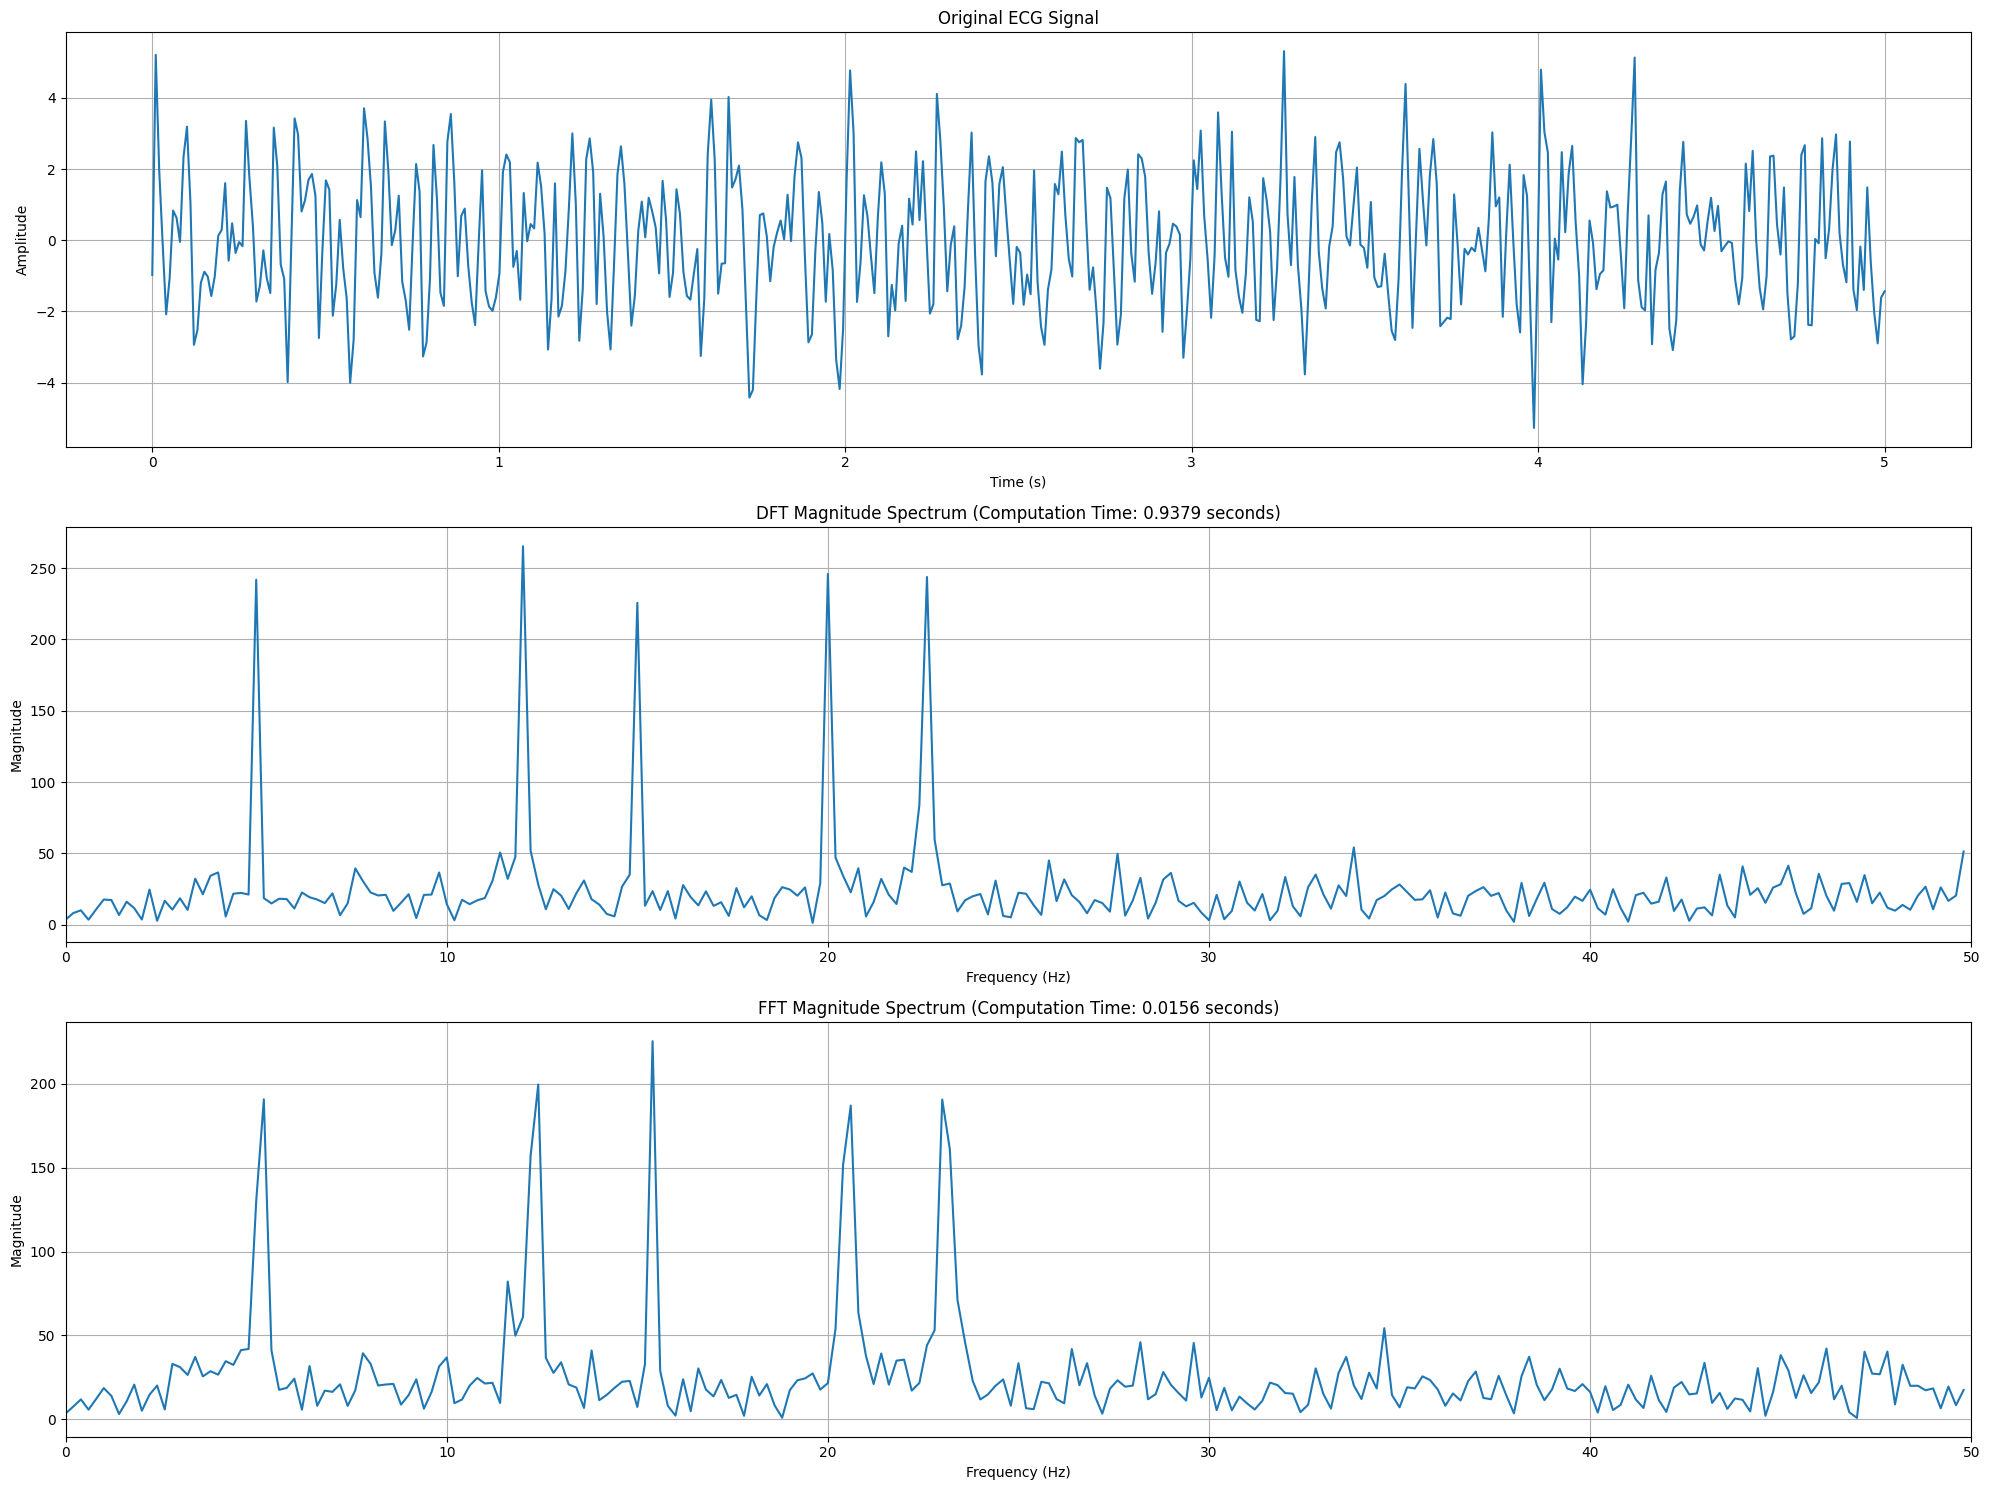

DFT Computation Time: 0.9379 seconds
FFT Computation Time: 0.0156 seconds
Speed-up factor: 59.99x
Maximum difference between DFT and FFT: 3.11e+02


In [71]:
# Create visualization
plt.figure(figsize=(20, 15))

# Plot original signal
plt.subplot(3, 1, 1)
plt.plot(time_axis, signal_combination)
plt.title('Original ECG Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Find index corresponding to 150 Hz
freq = np.fft.fftfreq(len(signal_combination), 1/fs)
freq_mask = (freq >= 0) & (freq <= fs/2)
# freq_mask = (freq >= 0) & (freq <= 150)

# Plot DFT magnitude spectrum
plt.subplot(3, 1, 2)
plt.plot(freq[freq_mask], np.abs(dft_result[freq_mask]))
plt.title(f'DFT Magnitude Spectrum (Computation Time: {dft_time:.4f} seconds)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 50)

# Plot FFT magnitude spectrum
plt.subplot(3, 1, 3)
plt.plot(freq[freq_mask], np.abs(fft_result[freq_mask]))
plt.title(f'FFT Magnitude Spectrum (Computation Time: {fft_time:.4f} seconds)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 50)

plt.tight_layout()
plt.show()

# Print performance comparison
print(f"DFT Computation Time: {dft_time:.4f} seconds")
print(f"FFT Computation Time: {fft_time:.4f} seconds")
print(f"Speed-up factor: {dft_time/fft_time:.2f}x")

print(f"Maximum difference between DFT and FFT: {np.max(np.abs(dft_result - fft_result)):.2e}")

### Fft with Scipy


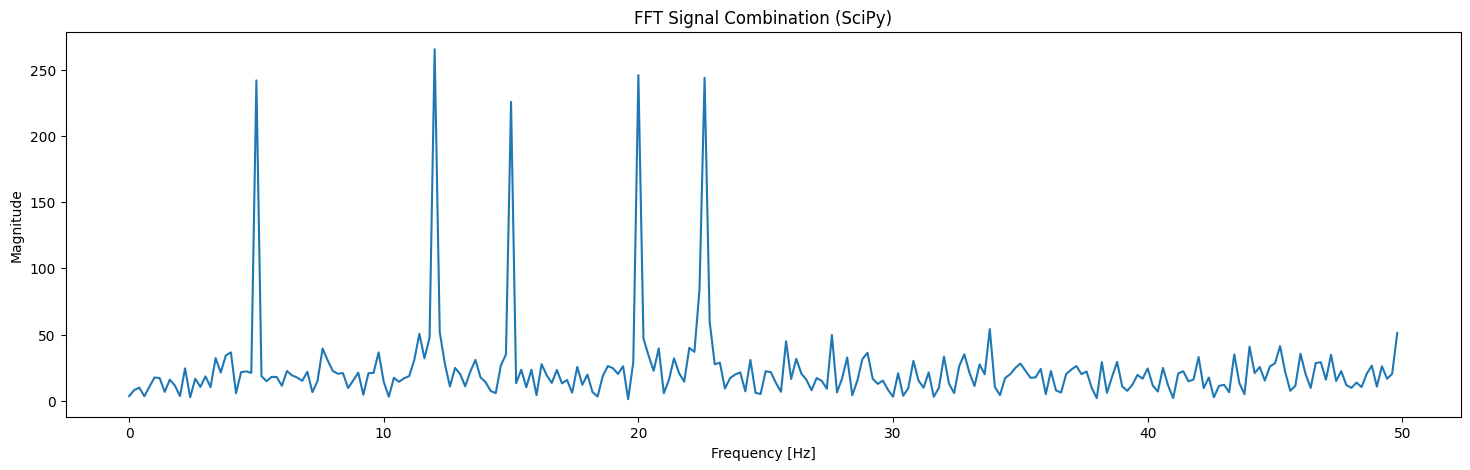

In [74]:
from scipy import fft

# Langkah 1: Hitung Panjang Sinyal
N = len(signal_combination)

# Langkah 2: Hitung FFT Menggunakan Fungsi FFT SciPy
fft_results = fft.fft(signal_combination)

# Langkah 3: Hitung x-axisnya
freq = fft.fftfreq(N, 1/fs)

plt.figure(figsize=(18, 5))
plt.plot(freq[freq_mask], np.abs(fft_results[freq_mask]))
plt.title('FFT Signal Combination (SciPy)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.show()

---
## IFFT (Inverse Fast Fourier Transform)

This method turns back from the freq domain into time domain.

c:\Users\ACER\miniconda3\envs\py310_dsp\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\ACER\miniconda3\envs\py310_dsp\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


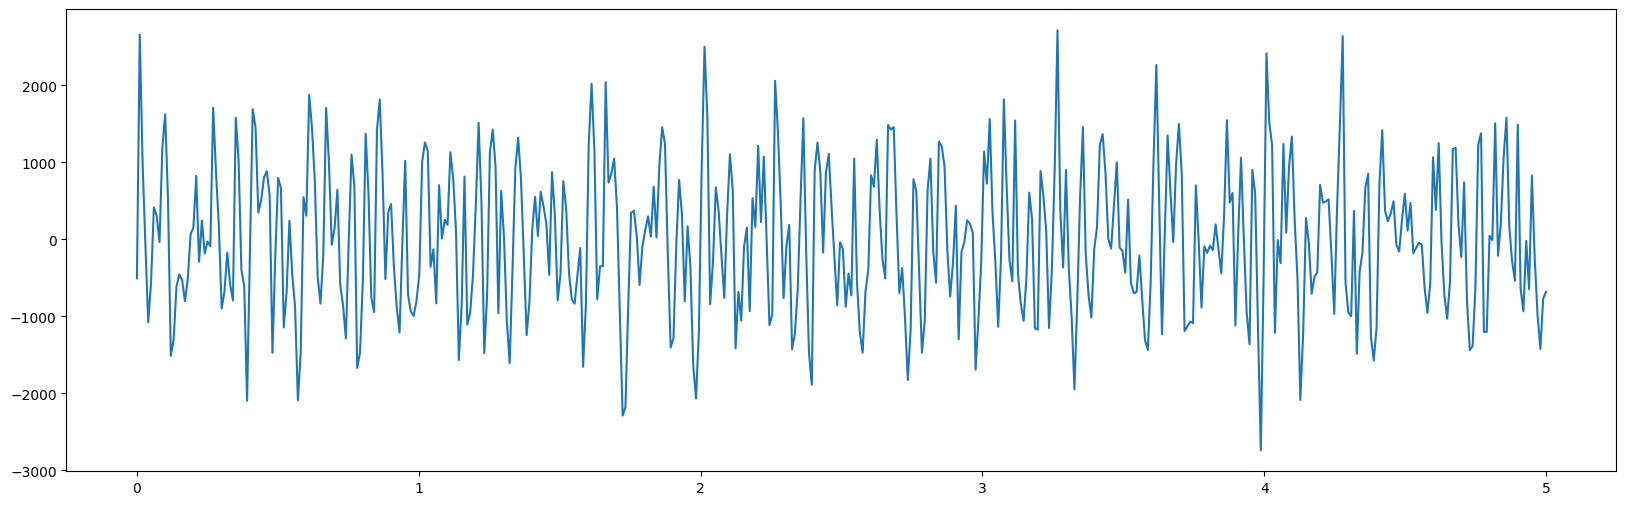

In [73]:
def next_power_of_2(n):
    """Return the next power of 2 greater than or equal to n."""
    return 1 << (n - 1).bit_length()

def pad_with_zeros(x):
    """Pad the input array with zeros to make its length a power of 2."""
    n = len(x)
    next_pow_2 = next_power_of_2(n)
    return np.pad(x, (0, next_pow_2 - n), 'constant')

def ifft(x):
    """Compute the Inverse Fast Fourier Transform of the input array x."""
    N = len(x)
    if N <= 1:  # Base case
        return x

    # Split the array into even and odd parts
    even = ifft(x[0::2])  # IFFT for even indices
    odd = ifft(x[1::2])   # IFFT for odd indices

    # Combine
    T = [np.exp(2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [(even[k] + T[k]) for k in range(N // 2)] + \
           [(even[k] - T[k]) for k in range(N // 2)]

def ifft_with_padding(x):
    """Compute the IFFT of the input signal with zero padding."""

    padded_signal = pad_with_zeros(x)

    # Perform IFFT
    ifft_result = ifft(padded_signal)

    # Normalize by dividing by the number of points
    return ifft_result[:len(x)]

# Show the graph
ifft_result = ifft_with_padding(fft_result)
plt.figure(figsize=(20, 6))
plt.plot(time_axis, ifft_result)
plt.show()
